# 변동성 돌파 전략 기본

> 래리 윌리엄스(Larry Williams)에 의해 개발되었다.  
> 매수/매도 시점을 결정할 때 기존 가격의 변동성을 이용하는 전략이다.  
> 전일 주가 변동폭을 기준으로 당일 특정 가격대 대한 상승 돌파가 이뤄질 때 매수한다.    
> 1일 보유 후에 다음날 시가에 매도한다. 


$
\text{목표가(진입가)} = \text{당일 시가} + (\text{전일 고가} - \text{전일 저가}) \times k
$

- k값이 작아질 수록 진입가가 낮아지고 매수를 더 자주 하게 된다.
- 반대로 k값이 커지면 더 까다롭게 진입시점을 잡게 되기 때문에 매수 기회가 줄어든다.
- 최적의 k값을 찾기 위해 백테스팅을 할 필요는 없음, 과거의 최적값이 미래의 최적값을 보장 하지는 않기 때문에 


## 장단점

### 장점
- 시장의 변화에 빠르게 대응할 수 있다.
- 매수/매도 시점이 명확하다. -> 전략을 수행하기 쉽다.

### 단점
- 1일 단타 전략이기 때문에 거래 비용이 크다.
- 군집을 갖춘 상승장이 자주 찾아오지 않는다.
- 시장 성격에 따라 (횡보장, 큰 일중 변동성) 휩소에 휘말릴 가능성이 크다.
- 전체 시장이 하락하는 상황에서는 수익을 올리기 어렵다. -> 흔하지 않은 대세 상승장

## 비트코인 일봉 데이터 다운로드

In [4]:
import numpy as np
import pandas as pd
import pyupbit

ticker = 'KRW-BTC'
df = pyupbit.get_ohlcv(ticker)
df

,open,high,low,close,volume,value
2023-10-31 09:00:00,46734000.0,47050000.0,46302000.0,47030000.0,4120.385152,1.922946e+11
2023-11-01 09:00:00,47030000.0,48165000.0,46720000.0,48079000.0,6327.331741,2.994112e+11
2023-11-02 09:00:00,48100000.0,48661000.0,46732000.0,47516000.0,5972.070398,2.854758e+11
2023-11-03 09:00:00,47524000.0,47524000.0,46203000.0,46676000.0,4936.170641,2.300478e+11
2023-11-04 09:00:00,46675000.0,47246000.0,46473000.0,47050000.0,2806.918565,1.313078e+11
...,...,...,...,...,...,...
2024-05-13 09:00:00,86521000.0,88485000.0,85410000.0,87928000.0,3085.907006,2.692833e+11
2024-05-14 09:00:00,87934000.0,88225000.0,85801000.0,86500000.0,2756.811579,2.391366e+11
2024-05-15 09:00:00,86500000.0,92444000.0,86200000.0,92111000.0,5272.786526,4.737347e+11
2024-05-16 09:00:00,92111000.0,92860000.0,90250000.0,90800000.0,3657.228846,3.346999e+11


## 비트코인 가격 추이 확인

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Price')]

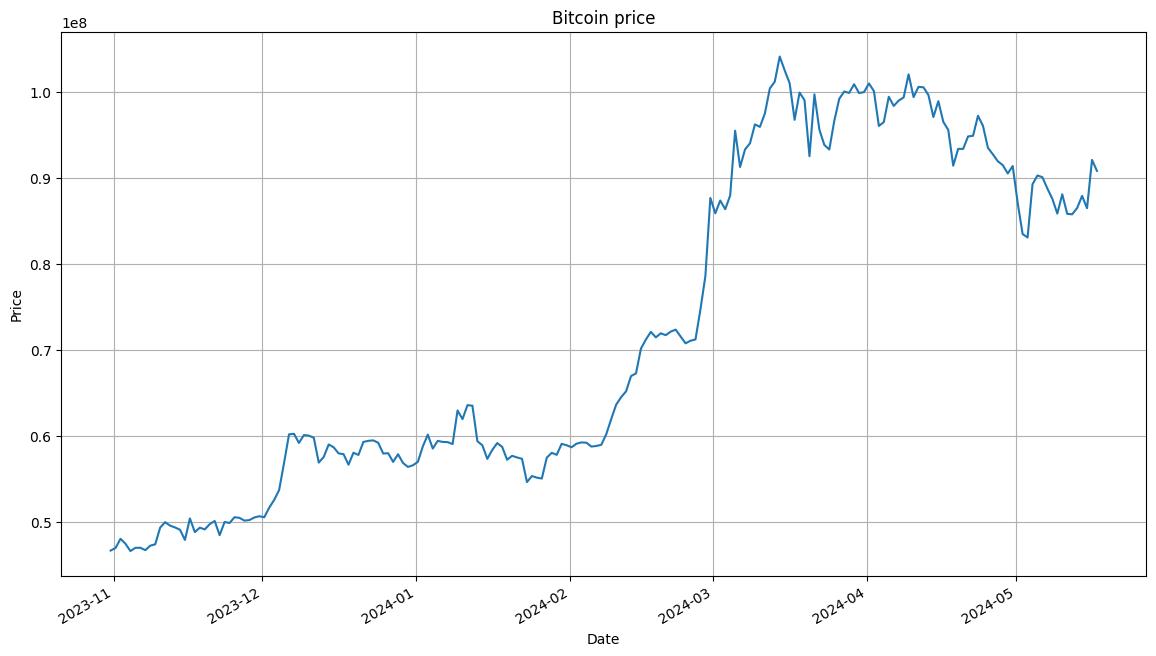

In [12]:
ax = df.open.plot(title='Bitcoin price', figsize=(14, 8), grid=True)
ax.set(xlabel='Date', ylabel='Price')

## 비트코인 단순 보유 수익률

> 날짜 : 2023-10-31 09:00:00, 가격 : 46734000.0  
날짜 : 2024-05-17 09:00:00, 가격 : 90839000.0  
수익률(%) : 94.37454529892584



In [18]:
initial_price = df.open[0]

print(f'날짜 : {df.iloc[0].name}, 가격 : {df.open[0]}')

today_price = df.open[-1]
print(f'날짜 : {df.iloc[-1]}, 가격 : {df.open[-1]}')

earning_rate = today_price / initial_price
print(f'수익률(%) : {(earning_rate - 1) * 100}')

날짜 : 2023-10-31 09:00:00, 가격 : 46734000.0
날짜 : open      9.083900e+07
high      9.182700e+07
low       9.070000e+07
close     9.182400e+07
volume    6.379657e+02
value     5.812132e+10
Name: 2024-05-17 09:00:00, dtype: float64, 가격 : 90839000.0
수익률(%) : 94.37454529892584


/var/folders/zs/1ztn5m_s7q78gg656_rywdw80000gn/T/ipykernel_61220/1871869064.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = df.open[0]
/var/folders/zs/1ztn5m_s7q78gg656_rywdw80000gn/T/ipykernel_61220/1871869064.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'날짜 : {df.iloc[0].name}, 가격 : {df.open[0]}')
/var/folders/zs/1ztn5m_s7q78gg656_rywdw80000gn/T/ipykernel_61220/1871869064.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

## 목표가 계산의 의미

변동성 돌파 전략에서는 주가의 '범위'를 계산하여 이를 기반으로 다음 날의 거래에 사용할 목표가를 설정합니다. 이 범위는 보통 전날의 고가(High)와 저가(Low) 차이로 계산되며, 이를 'Range'라고 합니다. 이 Range를 이용하여 다음과 같이 목표가(Target Price)를 설정합니다:

$$
\text{목표가} = \text{전날 종가} + (\text{Range} \times k)
$$

## 목표가 계산

고가에서 저가를 빼주는 계산을 합니다. 범위 계산 시 shift(1)을 해주는 이유는 전날의 고가와 저가에서 계산한 값을 한 행씩 미루게 만들어 줘서 목표가 연산을 쉽게 할 수 있습니다. 

목표가 계산 시 k 값은 0.5로 설정하였습니다. 

In [25]:
# 범위
df['range'] = df.high - df.low

# 목표가
k = 0.5
df['target'] = df.open + df['range'].shift(1) * k

df

,open,high,low,close,volume,value,range,target
2023-10-31 09:00:00,46734000.0,47050000.0,46302000.0,47030000.0,4120.385152,1.922946e+11,748000.0,NaN
2023-11-01 09:00:00,47030000.0,48165000.0,46720000.0,48079000.0,6327.331741,2.994112e+11,1445000.0,47404000.0
2023-11-02 09:00:00,48100000.0,48661000.0,46732000.0,47516000.0,5972.070398,2.854758e+11,1929000.0,48822500.0
2023-11-03 09:00:00,47524000.0,47524000.0,46203000.0,46676000.0,4936.170641,2.300478e+11,1321000.0,48488500.0
2023-11-04 09:00:00,46675000.0,47246000.0,46473000.0,47050000.0,2806.918565,1.313078e+11,773000.0,47335500.0
...,...,...,...,...,...,...,...,...
2024-05-13 09:00:00,86521000.0,88485000.0,85410000.0,87928000.0,3085.907006,2.692833e+11,3075000.0,87201000.0
2024-05-14 09:00:00,87934000.0,88225000.0,85801000.0,86500000.0,2756.811579,2.391366e+11,2424000.0,89471500.0
2024-05-15 09:00:00,86500000.0,92444000.0,86200000.0,92111000.0,5272.786526,4.737347e+11,6244000.0,87712000.0
2024-05-16 09:00:00,92111000.0,92860000.0,90250000.0,90800000.0,3657.228846,3.346999e+11,2610000.0,95233000.0


## 매수 유무 컬럼 추가

오늘의 고가가 돌파 가격을 넘어 섰다면 1(매수), 아니면 0 값을 갖는 컬럼을 추가합니다.

In [26]:
df['buy'] = np.where(df.high > df.target, 1, 0)

df

,open,high,low,close,volume,value,range,target,buy
2023-10-31 09:00:00,46734000.0,47050000.0,46302000.0,47030000.0,4120.385152,1.922946e+11,748000.0,NaN,0
2023-11-01 09:00:00,47030000.0,48165000.0,46720000.0,48079000.0,6327.331741,2.994112e+11,1445000.0,47404000.0,1
2023-11-02 09:00:00,48100000.0,48661000.0,46732000.0,47516000.0,5972.070398,2.854758e+11,1929000.0,48822500.0,0
2023-11-03 09:00:00,47524000.0,47524000.0,46203000.0,46676000.0,4936.170641,2.300478e+11,1321000.0,48488500.0,0
2023-11-04 09:00:00,46675000.0,47246000.0,46473000.0,47050000.0,2806.918565,1.313078e+11,773000.0,47335500.0,0
...,...,...,...,...,...,...,...,...,...
2024-05-13 09:00:00,86521000.0,88485000.0,85410000.0,87928000.0,3085.907006,2.692833e+11,3075000.0,87201000.0,1
2024-05-14 09:00:00,87934000.0,88225000.0,85801000.0,86500000.0,2756.811579,2.391366e+11,2424000.0,89471500.0,0
2024-05-15 09:00:00,86500000.0,92444000.0,86200000.0,92111000.0,5272.786526,4.737347e+11,6244000.0,87712000.0,1
2024-05-16 09:00:00,92111000.0,92860000.0,90250000.0,90800000.0,3657.228846,3.346999e+11,2610000.0,95233000.0,0


## 일별 수익률 계산

매수를 하지 않았다면 수익률은 0이 됩니다. 매수를 했다면 다음날의 시가에 매도를 한다고 가정하고 수익률을 계산합니다.


$$
\text{수익률} = \frac{\text{종가}}{\text{목표가}}
$$

In [40]:

df['daily_return'] = np.where(df.buy == 1, df.close / df.target, 1)

df

,open,high,low,close,volume,value,range,target,buy,earning_rate,daily_return,cumulative_return
2023-10-31 09:00:00,46734000.0,47050000.0,46302000.0,47030000.0,4120.385152,1.922946e+11,748000.0,NaN,0,0.000000,1.000000,0.000000e+00
2023-11-01 09:00:00,47030000.0,48165000.0,46720000.0,48079000.0,6327.331741,2.994112e+11,1445000.0,47404000.0,1,0.000000,1.014239,1.014239e+00
2023-11-02 09:00:00,48100000.0,48661000.0,46732000.0,47516000.0,5972.070398,2.854758e+11,1929000.0,48822500.0,0,0.022751,1.000000,1.014239e+00
2023-11-03 09:00:00,47524000.0,47524000.0,46203000.0,46676000.0,4936.170641,2.300478e+11,1321000.0,48488500.0,0,0.000000,1.000000,1.014239e+00
2023-11-04 09:00:00,46675000.0,47246000.0,46473000.0,47050000.0,2806.918565,1.313078e+11,773000.0,47335500.0,0,0.000000,1.000000,1.014239e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 09:00:00,86521000.0,88485000.0,85410000.0,87928000.0,3085.907006,2.692833e+11,3075000.0,87201000.0,1,0.008509,1.008337,6.300802e+24
2024-05-14 09:00:00,87934000.0,88225000.0,85801000.0,86500000.0,2756.811579,2.391366e+11,2424000.0,89471500.0,0,0.016331,1.000000,6.300802e+24
2024-05-15 09:00:00,86500000.0,92444000.0,86200000.0,92111000.0,5272.786526,4.737347e+11,6244000.0,87712000.0,1,0.000000,1.050153,1.291761e+25
2024-05-16 09:00:00,92111000.0,92860000.0,90250000.0,90800000.0,3657.228846,3.346999e+11,2610000.0,95233000.0,0,0.064867,1.000000,1.291761e+25


## 누적 수익률 계산

누적 수익률은 각 일별 수익률을 누적하여 계산합니다.

$$
\text{누적 수익률} = \prod_{i=1}^{n} (1 + \text{수익률}_i) - 1
$$

누적 수익률 : 1.77


/var/folders/zs/1ztn5m_s7q78gg656_rywdw80000gn/T/ipykernel_61220/2213784975.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'누적 수익률 : {df.cumulative_return[-1]:.2f}')


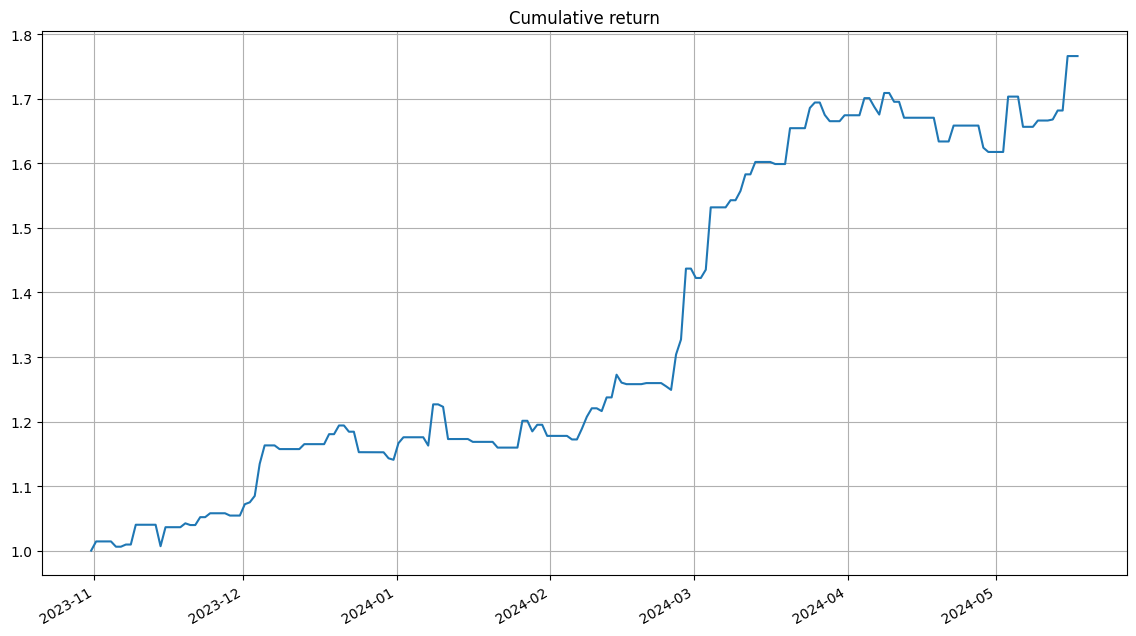

In [43]:

df['cumulative_return'] = df.daily_return.cumprod()

# 수익률 그래프
ax = df.cumulative_return.plot(title='Cumulative return', figsize=(14, 8), grid=True)

# 최종 수익률
print(f'누적 수익률 : {df.cumulative_return[-1]:.2f}')